### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4
#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Легиньких Галина
##### Группа:   НФИбд-02-21

##### Москва 2024
***

### Вариант № 6 (Wine Data Set) 

Название файла: wine.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Wine 

Первый признак: alcohol (столбец No 2) 

Второй признак: color-intensity (столбец No 11) 

Третий признак: optical-density (столбец No 13) 

Класс: cultivar (столбец No 1) 

Метод обработки пропущенных значений – медиана признака  

Метод нормализации признаков – стандартизация  

Алгоритм снижения размерности данных – метод главных компонент (PCA)  

Метод валидации модели – кросс-валидация по 5 блокам  

Показатель качества модели – доля верных ответов (accuracy)  

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

Считала значения трех признаков и метки класса.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# данные из репозитария UCI
url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/wine/wine.data"

wine = pd.read_csv(url, header=None)
wine = wine[[1, 10, 12, 0]]
wine.columns = ['Alcohol',  'Color intensity', 'Optical-density', 'Cultivar']
wine

,Alcohol,Color intensity,Optical-density,Cultivar
0,14.23,5.64,3.92,1
1,13.20,4.38,3.40,1
2,13.16,5.68,3.17,1
3,14.37,7.80,3.45,1
4,13.24,4.32,2.93,1
...,...,...,...,...
173,13.71,7.70,1.74,3
174,13.40,7.30,1.56,3
175,13.27,10.20,1.56,3
176,13.17,9.30,1.62,3


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score) . Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов.

Среди меток класса нет пропущенных значений. Среди признаков тоже.

In [77]:
print('Число пропущенных значений:')
for col in wine.columns:
    print("NaN in", col,"=", wine[col].isna().sum())

Число пропущенных значений:
NaN in Alcohol = 0
NaN in Color intensity = 0
NaN in Optical-density = 0
NaN in Cultivar = 0


В датафрейме 3 метки класса.

In [78]:
len(wine['Cultivar'].unique())

3

Ниже я изобразила диаграмму размаха (boxplot) столбцов без разбияения на классы, чтобы найти столбцы таблицы, которые содержат выбросы. 

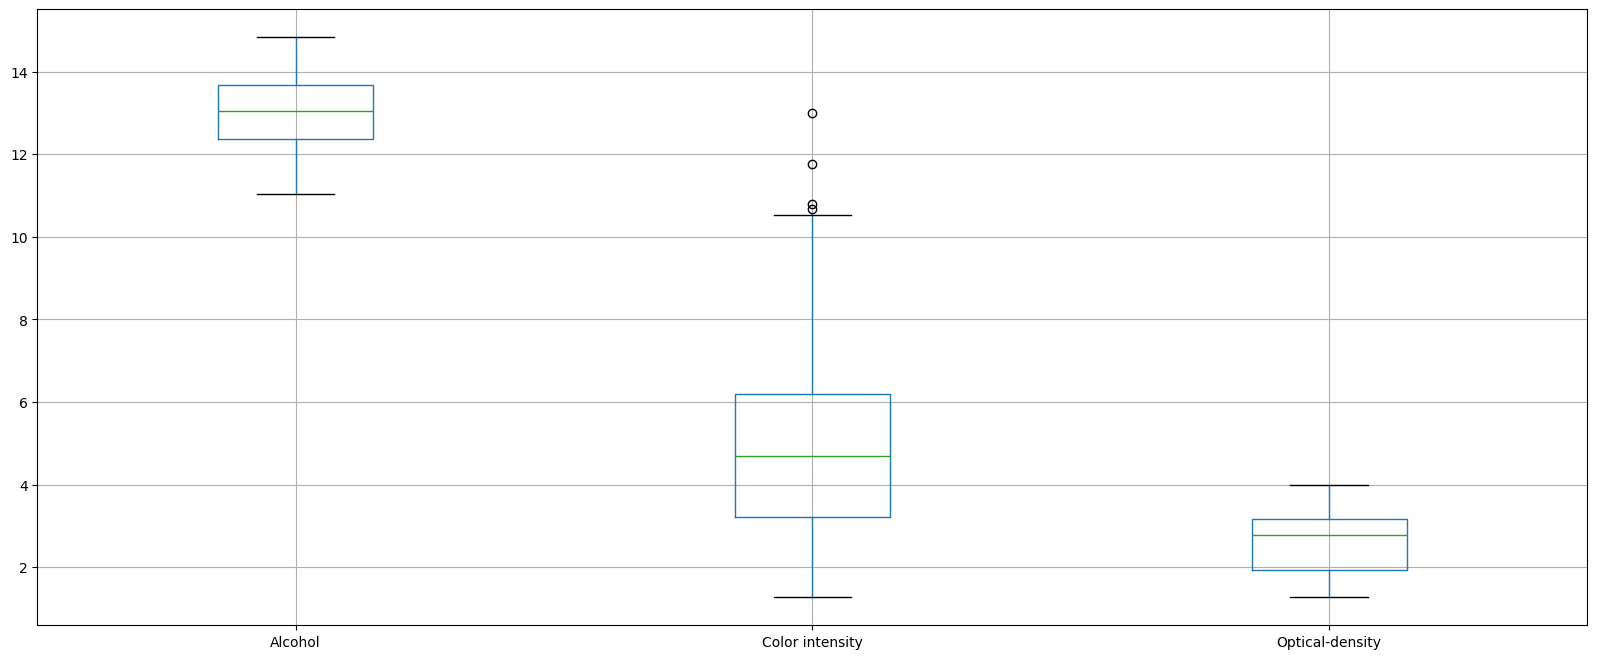

In [79]:
wine2 = wine.drop(['Cultivar'],axis=1)
wine2.boxplot(figsize=(20, 8))
plt.show()

Диаграммы размаха показывают, что только один столбец (Color intensity) содержат ненормально большие значения. 

Чтобы убрать выбросы, посчитала стандартизованную оценку (Z-score) для каждого признака и убрала записи, содержащие атрибуты с ненормально высоким Z-score ($Z>2$ или $Z<-2$). Я так подобрала значения [-2,2], что выброс сотавил 6,74%, что удовлетворяет условию.

In [80]:
Z = (wine2-wine2.mean())/wine2.std()
print('Число записей до удаления выбросов = %d' % (Z.shape[0]))
Z2 = Z.loc[((Z >= -2).sum(axis=1) == 3) & ((Z <= 2).sum(axis=1) == 3)]
print('Число записей после удаления выбросов = %d' % (Z2.shape[0]))
# Получаем индексы строк, которые не являются выбросами
clean_indices = Z2.index
# Удаляем строки-выбросы из исходной таблицы wine
wine_new = wine.loc[clean_indices].copy()
wine_new = wine_new.reset_index(drop=True)
wine_new

Число записей до удаления выбросов = 178
Число записей после удаления выбросов = 166


,Alcohol,Color intensity,Optical-density,Cultivar
0,14.23,5.64,3.92,1
1,13.20,4.38,3.40,1
2,13.16,5.68,3.17,1
3,14.37,7.80,3.45,1
4,13.24,4.32,2.93,1
...,...,...,...,...
161,12.20,5.50,1.83,3
162,13.71,7.70,1.74,3
163,13.40,7.30,1.56,3
164,13.17,9.30,1.62,3


Как мы видим, точки с выбросами отсутствуют. 

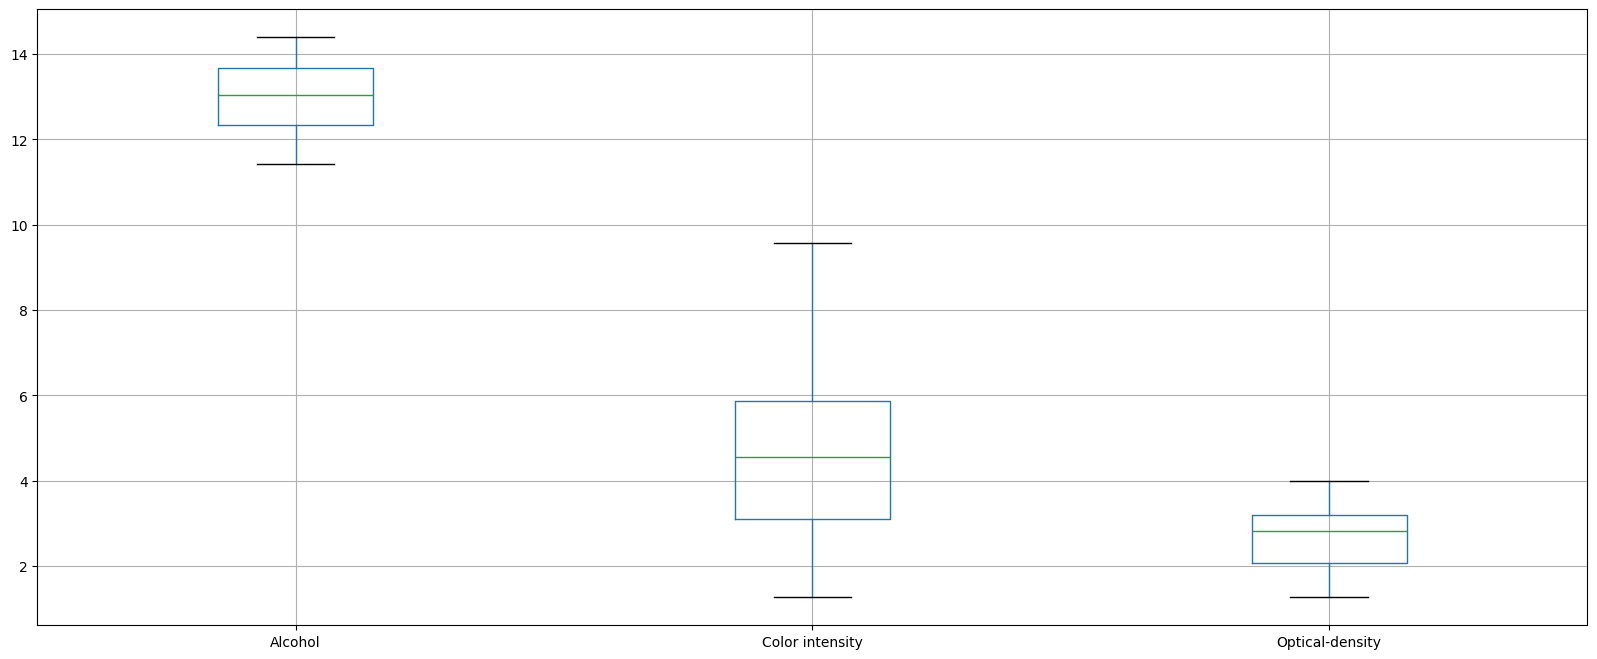

In [81]:
wine_new[['Alcohol', 'Color intensity', 'Optical-density']].boxplot(figsize=(20, 8))
plt.show()

3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании. У меня метод стандартизации.

Отобрала столбцы для нормализации признаков. После нахождения перезаписала их в таблицу wine_new.

In [82]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['Alcohol',  'Color intensity', 'Optical-density']
scaler = StandardScaler().fit(wine_new[columns_to_standardize])
wine_new[columns_to_standardize] = scaler.transform(wine_new[columns_to_standardize])
wine_new

,Alcohol,Color intensity,Optical-density,Cultivar
0,1.603009,0.450395,1.811697,1
1,0.291547,-0.198353,1.064227,1
2,0.240616,0.470991,0.733615,1
3,1.781266,1.562535,1.136099,1
4,0.342477,-0.229245,0.388629,1
...,...,...,...,...
161,-0.981718,0.378312,-1.192557,3
162,0.940912,1.511047,-1.321927,3
163,0.546200,1.305095,-1.580667,3
164,0.253349,2.334854,-1.494420,3


4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

Визуализировала набор данных в 3d.

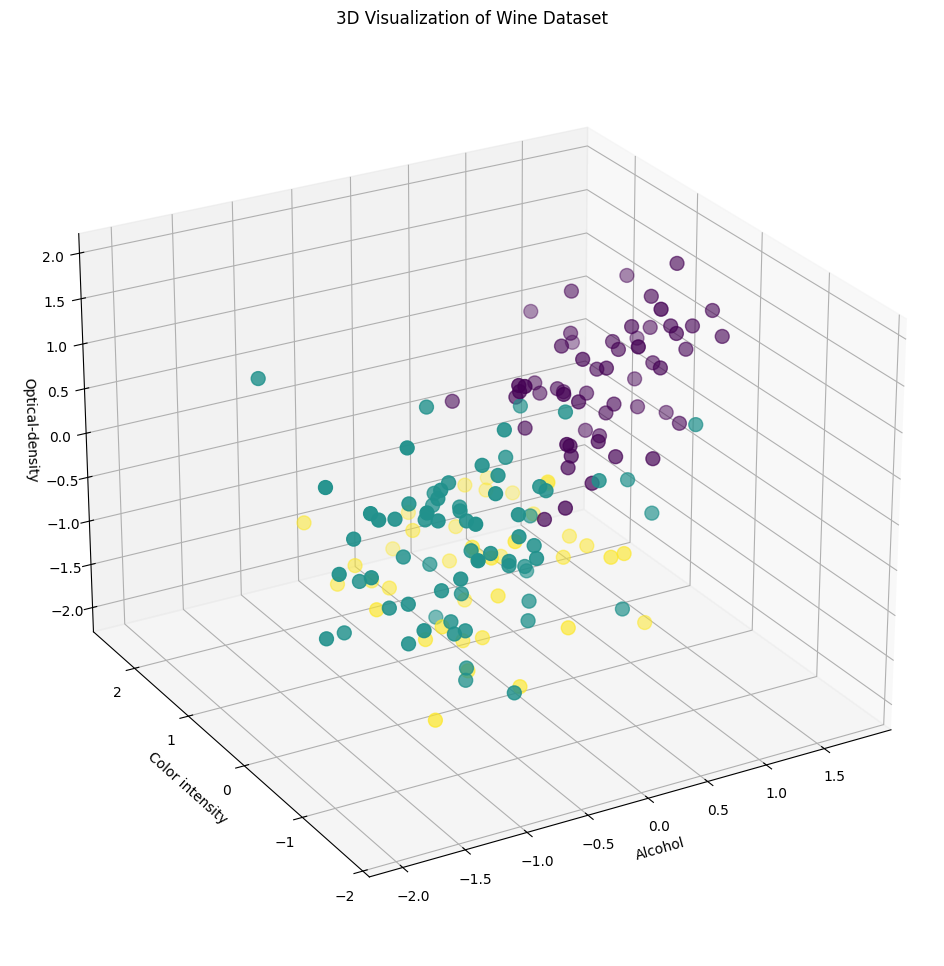

In [83]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

# Извлекаем координаты
xs = wine_new['Alcohol']
ys = wine_new['Color intensity']
zs = wine_new['Optical-density']

# Отображаем точки, используя Cultivar для цветовой кодировки
ax.scatter(xs, ys, zs, c=wine_new['Cultivar'], s=100, cmap='viridis')

# Подписываем оси
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color intensity')
ax.set_zlabel('Optical-density')
ax.set_title('3D Visualization of Wine Dataset')

# Устанавливаем вид
ax.view_init(azim=-120, elev=25)

# Показать график
plt.show()

5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

У меня метод главных компонент.

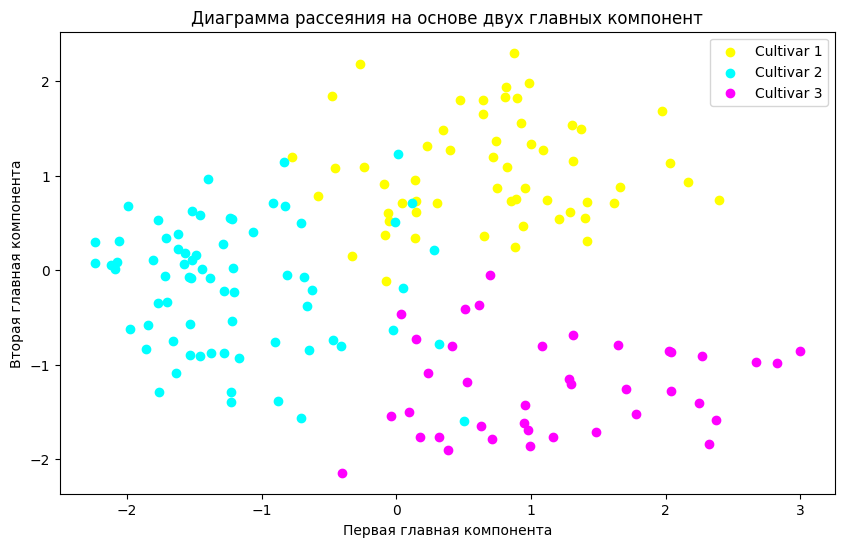

In [84]:
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=2)
pcad = pca.fit_transform(wine_new.drop('Cultivar', axis=1))  # Убираем 'Cultivar' перед применением PCA
Y = wine_new['Cultivar']

# Визуализация результатов
plt.figure(figsize=(10, 6))
colors = ['yellow', 'cyan', 'magenta']
for class_value in Y.unique():  # Визуализация точек для каждого класса
    plt.scatter(pcad[Y == class_value, 0], pcad[Y == class_value, 1], 
                label=f'Cultivar {class_value}', c=colors[class_value-1])

wine1 =pcad

plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Диаграмма рассеяния на основе двух главных компонент')
plt.legend()
plt.show()


6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок. 

Посмотрим сколько у нас записей.

In [85]:
wine1.shape, Y.shape

((166, 2), (166,))

Разделила набор данных на обучающую и тестовую выборки.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine1, Y, test_size=0.25, random_state=666)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((124, 2), (124,), (42, 2), (42,))

Провела классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определила оптимальное значение параметра К с минимальной долей ошибок. 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("Лучшее k =", best_k)
print("Лучшая оценка =", best_score)

Лучшее k = 3
Лучшая оценка = 0.9285714285714286


7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

Количество неправильно распределенных точек.

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_mat=confusion_matrix(y_test,y_pred)
mislabel = np.sum((y_test!=y_pred))
print(conf_mat)
print("Количество неправильно классифицированных точек из {} точек тестового множества равно {}".format(len(y_test),mislabel))
print("Доля ошибок неправильной классификации:",round(np.mean(y_pred!=y_test),3))

[[12  0  0]
 [ 1 21  2]
 [ 0  0  6]]
Количество неправильно классифицированных точек из 42 точек тестового множества равно 3
Доля ошибок неправильной классификации: 0.071


In [89]:
print("Отчет о классификации:\n")
print(classification_report(y_test,y_pred))

Отчет о классификации:

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93        24
           3       0.75      1.00      0.86         6

    accuracy                           0.93        42
   macro avg       0.89      0.96      0.92        42
weighted avg       0.94      0.93      0.93        42



8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов: 

• наивного байесовского классификатора 

• классификатора метода К ближайших соседей для значения К, определенного в п. 6. 

In [90]:
X = wine_new[['Alcohol',  'Color intensity', 'Optical-density']]

In [91]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.25)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((124, 3), (124,), (42, 3), (42,))

#### 1. Наивный байесовский классификатор

In [92]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train2, y_train2)  # Обучение модели на обучающей выборке
y_pred_nb = nb_model.predict(X_test2)  # Предсказание классов для тестовой выборки

# Оценка точности модели Наивного Байеса
accuracy_nb = accuracy_score(y_test2, y_pred_nb)
mislabel = np.sum((y_test2!=y_pred_nb))
print("Количество неправильно классифицированных точек из {} точек тестового множества равно {}".format(len(y_test),mislabel))
print(f"Точность наивного байесовского классификатора: {accuracy_nb:.4f}")

Количество неправильно классифицированных точек из 42 точек тестового множества равно 4
Точность наивного байесовского классификатора: 0.9048


#### 2. Классификатор метода K ближайших соседей (с оптимальным K из п. 6)

In [93]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train2, y_train2)  
y_pred_knn = knn_model.predict(X_test2)  

# Оценка точности модели KNN
accuracy_knn = accuracy_score(y_test2, y_pred_knn)
mislabel = np.sum((y_test2!=y_pred_knn))
print("Количество неправильно классифицированных точек из {} точек тестового множества равно {}".format(len(y_test),mislabel))
print(f"Точность классификатора K ближайших соседей (K={best_k}): {accuracy_knn:.4f}")

Количество неправильно классифицированных точек из 42 точек тестового множества равно 4
Точность классификатора K ближайших соседей (K=3): 0.9048


9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя. 

Метод валидации модели – кросс-валидация по 5 блокам  

Показатель качества модели – доля верных ответов (accuracy)  

#### 1. Наивный байесовский классификатор

In [94]:
from sklearn.model_selection import cross_val_score

cv_scores_nb = cross_val_score(nb_model, X, Y, cv=5)

# Выводим среднее значение и дисперсию
print("Доля верных ответов (accuracy): %.2f%%" % (cv_scores_nb.mean()*100.0)) 
print(f"Наивный байесовский классификатор - средняя доля верных ответов: {np.mean(cv_scores_nb):.4f}")
print(f"Наивный байесовский классификатор - дисперсия: {np.var(cv_scores_nb):.4f}")

Доля верных ответов (accuracy): 91.02%
Наивный байесовский классификатор - средняя доля верных ответов: 0.9102
Наивный байесовский классификатор - дисперсия: 0.0057


#### 2. Классификатор метода K ближайших соседей (с оптимальным K из п. 6)

In [95]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Выполняем кросс-валидацию по 5 блокам
cv_scores_knn = cross_val_score(knn_model, X, Y, cv=5)

# Выводим среднее значение и дисперсию
print("Доля верных ответов (accuracy): %.2f%%" % (cv_scores_knn.mean()*100.0)) 
print(f"KNN (K={best_k}) - средняя доля верных ответов: {np.mean(cv_scores_knn):.4f}")
print(f"KNN (K={best_k}) - дисперсия: {np.var(cv_scores_knn):.4f}")

Доля верных ответов (accuracy): 90.43%
KNN (K=3) - средняя доля верных ответов: 0.9043
KNN (K=3) - дисперсия: 0.0068


10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

Наивный байесовский классификатор позволяет получить более высокое среднее значение показателя классификации. Проводим классификацию на обучающую выборку.

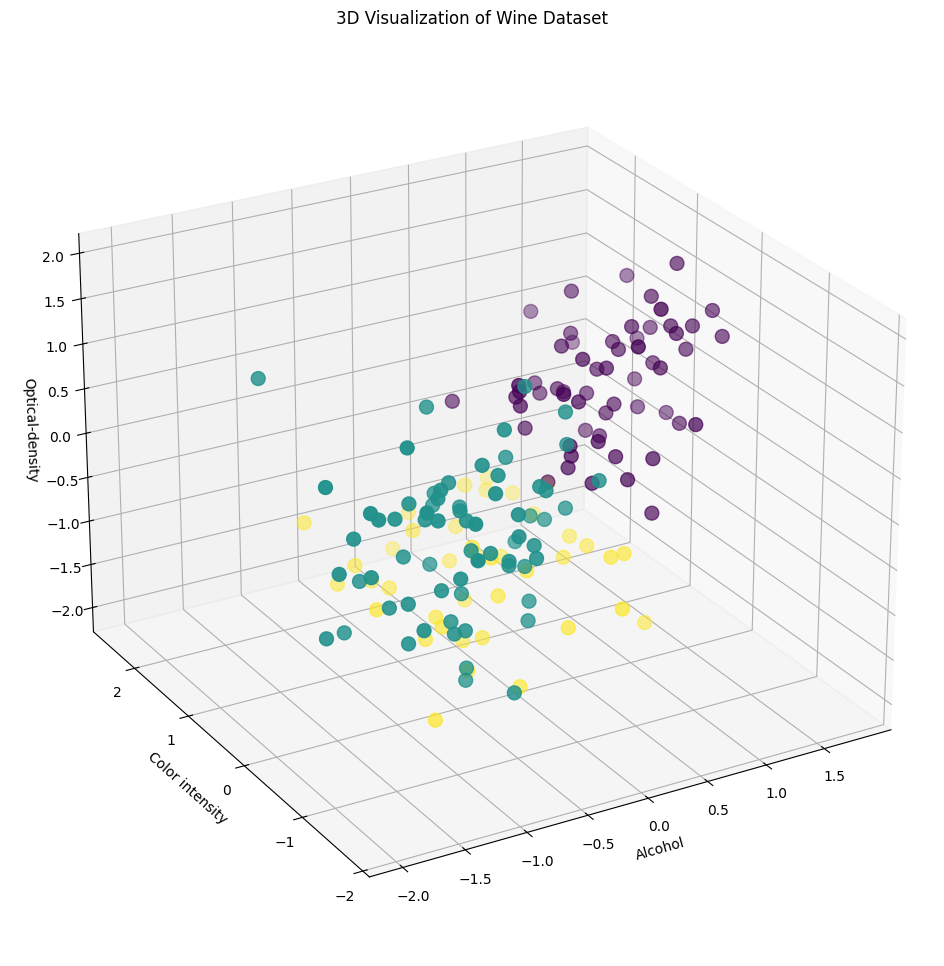

In [96]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

y_pred = nb_model.predict(X)

# Извлекаем координаты
xs = X['Alcohol']
ys = X['Color intensity']
zs = X['Optical-density']

# Отображаем точки, используя Cultivar для цветовой кодировки
ax.scatter(xs, ys, zs, c=y_pred, s=100, cmap='viridis')

# Подписываем оси
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color intensity')
ax.set_zlabel('Optical-density')
ax.set_title('3D Visualization of Wine Dataset')

# Устанавливаем вид
ax.view_init(azim=-120, elev=25)

# Показать график
plt.show()